# Health Professional Shortage Areas - Exploratory Data Analysis
---
### Which regions/states/counties in the U.S. are facing the most severe shortages of healthcare professionals?
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from get_cleaned_hpsa import hpsa

In [20]:
# Export cleaned hpsa dataframe to csv
# hpsa.to_csv('cleaned_data/hpsa.csv', index = False)

# Get info about cleaned hpsa dataframe
hpsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 346 to 64846
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   HPSA Name                              1047 non-null   object        
 1   Designation Type                       1047 non-null   object        
 2   HPSA Score                             1047 non-null   int64         
 3   HPSA Status                            1047 non-null   object        
 4   HPSA Designation Date                  1047 non-null   datetime64[ns]
 5   HPSA Designation Last Update Date      1047 non-null   datetime64[ns]
 6   HPSA FTE                               1047 non-null   float64       
 7   HPSA Designation Population            1047 non-null   float64       
 8   % of Population Below 100% Poverty     1047 non-null   float64       
 9   HPSA Formal Ratio                      870 non-null    objec

---
### How many states are represented?  (i.e. How many states out of 50 have counties designated as shortage areas?)
#### **Answer: 42/50 states have any number of HPSA counties.**

In [3]:
# Create a dictionary with all 50 U.S. states and the total number of counties in each state
total_counties = {
    'Texas': 254, 'Georgia': 159, 'Virginia': 134, 'Kentucky': 120, 'Missouri': 115,
    'Kansas': 105, 'Illinois': 102, 'North Carolina': 100, 'Iowa': 99, 'Tennessee': 95,
    'Nebraska': 93, 'Indiana': 92, 'Ohio': 88, 'Minnesota': 87, 'Michigan': 83,
    'Mississippi': 82, 'Oklahoma': 77, 'Arkansas': 75, 'Wisconsin': 72, 'Pennsylvania': 67,
    'Florida': 67, 'Alabama': 67, 'South Dakota': 66, 'Louisiana': 64, 'Colorado': 64,
    'New York': 62, 'California': 58, 'Montana': 56, 'West Virginia': 55, 'North Dakota': 53,
    'South Carolina': 46, 'Idaho': 44, 'Washington': 39, 'Oregon': 36, 'New Mexico': 33,
    'Utah': 29, 'Alaska': 30, 'Maryland': 24, 'Wyoming': 23, 'New Jersey': 21, 'Nevada': 17,
    'Maine': 16, 'Arizona': 15, 'Vermont': 14, 'Massachusetts': 14, 'New Hampshire': 10,
    'Connecticut': 8, 'Rhode Island': 5, 'Hawaii': 5, 'Delaware': 3
}

# Make dictionary a series
total_counties = pd.Series(total_counties)

In [4]:
# Count the number of states in the hpsa dataframe
hpsa_states = hpsa['Common State Name'].unique()
len(hpsa_states)

42

In [5]:
# Which states are NOT represented in hpsa?
fifty_states = total_counties.index

non_hpsa_states = fifty_states[~fifty_states.isin(hpsa_states)]

non_hpsa_states

Index(['New Jersey', 'Maine', 'Arizona', 'Vermont', 'New Hampshire',
       'Connecticut', 'Rhode Island', 'Delaware'],
      dtype='object')

---
### For all 50 states, which states have the highest percentage of their counties designated as shortage areas?
#### **Answer:**

In [6]:
# In the hpsa dataframe, group by state and count the number of counties
hpsa_counties = hpsa.groupby('Common State Name')['HPSA Name'].count()

# Calculate percent of counties designated as shortage areas for each state
percent_shortage = hpsa_counties / total_counties

percent_shortage.sort_values(ascending = False)

Alabama           0.731343
North Dakota      0.698113
New Mexico        0.666667
Mississippi       0.658537
Alaska            0.633333
Hawaii            0.600000
Louisiana         0.562500
South Dakota      0.560606
Texas             0.547244
Virginia          0.529851
Nevada            0.529412
Montana           0.482143
Kentucky          0.475000
Indiana           0.423913
Illinois          0.372549
Wyoming           0.347826
Georgia           0.345912
Minnesota         0.344828
South Carolina    0.326087
Colorado          0.312500
Utah              0.310345
Tennessee         0.294737
Iowa              0.282828
Washington        0.256410
Arkansas          0.253333
Nebraska          0.236559
Idaho             0.227273
Oregon            0.222222
Oklahoma          0.220779
Florida           0.208955
Ohio              0.193182
North Carolina    0.190000
Kansas            0.180952
Wisconsin         0.180556
Missouri          0.165217
West Virginia     0.145455
Massachusetts     0.142857
M

In [7]:
# Get the sample size for HPSA counties in each state
hpsa.groupby(['Region Alias', 'Common State Name'])['HPSA Name'].count()

Region Alias        Common State Name
Great Lakes         Illinois              38
                    Indiana               39
                    Michigan              10
                    Minnesota             30
                    Ohio                  17
                    Wisconsin             13
Mid Atlantic        Maryland               1
                    Pennsylvania           1
                    Virginia              71
                    West Virginia          8
New England         Massachusetts          2
North Far West      Alaska                19
                    Idaho                 10
                    Oregon                 8
                    Washington            10
Northeast Corridor  New York               4
Northern Plains     Iowa                  28
                    Kansas                19
                    Missouri              19
                    Nebraska              22
Rocky Mountains     Colorado              20
                 

---
### What are the HPSA scores in the top ten states in terms of highest % counties that are shortage areas?
#### **Answer: The top five states in terms of average HPSA scores are: Mississippi (15.6), New Mexico (15.1), Hawaii (15.0), Louisiana (14.6), & Alabama (14.6)**

In [8]:
''' These are the top ten states:
Alabama           0.731343
North Dakota      0.698113
New Mexico        0.666667
Mississippi       0.658537
Alaska            0.633333
Hawaii            0.600000
Louisiana         0.562500
South Dakota      0.560606
Texas             0.547244
Virginia          0.529851
'''
top_ten = ['Alabama', 'North Dakota', 'New Mexico', 'Mississippi', 'Alaska',
           'Hawaii', 'Louisiana', 'South Dakota', 'Texas', 'Virginia']

# Create a new df for those top ten states
top_ten_df = hpsa[hpsa['Common State Name'].isin(top_ten)]

# Get descriptive statistics for HPSA Score
top_ten_df.groupby('Common State Name')['HPSA Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Common State Name,,,,,,,,
Alabama,49.0,14.632653,4.270509,5.0,12.00,15.0,18.00,23.0
Alaska,19.0,13.684211,3.916527,7.0,11.50,13.0,17.00,22.0
Hawaii,3.0,15.000000,1.000000,14.0,14.50,15.0,15.50,16.0
Louisiana,36.0,14.638889,2.899781,7.0,12.75,15.0,16.25,19.0
Mississippi,54.0,15.611111,3.657077,9.0,13.00,15.5,18.00,23.0
New Mexico,22.0,15.090909,3.293704,7.0,14.00,16.0,17.00,20.0
North Dakota,37.0,12.783784,3.334459,4.0,11.00,13.0,14.00,20.0
South Dakota,37.0,13.891892,3.956596,7.0,11.00,14.0,17.00,22.0
Texas,139.0,12.899281,3.508365,4.0,11.00,13.0,15.50,20.0


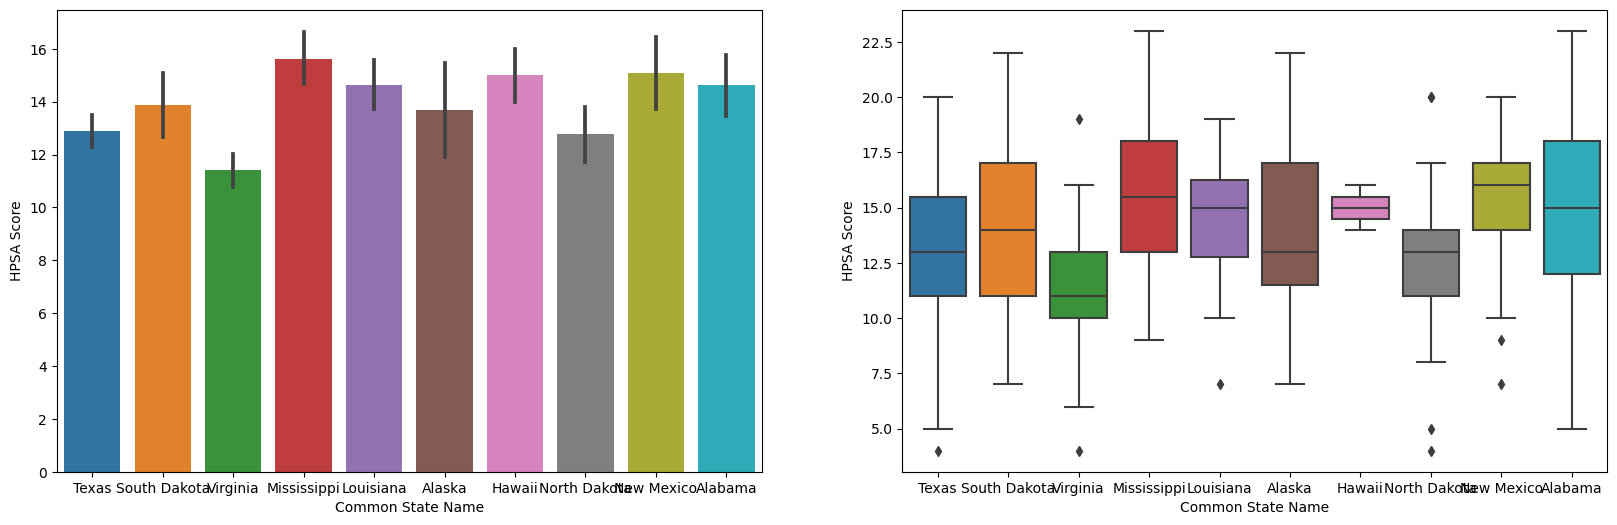

In [9]:
# Create barplot and boxplot for HPSA Score by state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.barplot(top_ten_df, x = 'Common State Name', y = 'HPSA Score')

plt.subplot(1, 2, 2)
sns.boxplot(top_ten_df, x = 'Common State Name', y = 'HPSA Score')

plt.show()

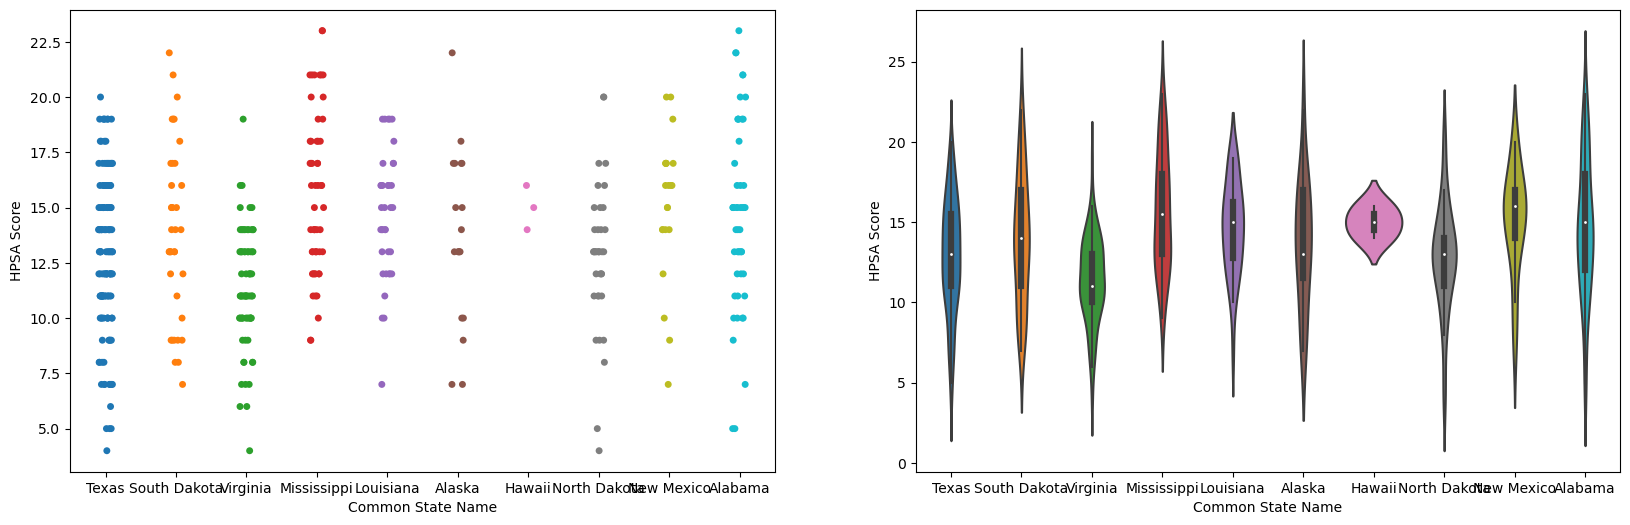

In [10]:
# Create strip plot and violin plot for HPSA Score by region
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.stripplot(top_ten_df, x = 'Common State Name', y = 'HPSA Score', hue = 'Common State Name', legend = False)

plt.subplot(1, 2, 2)
sns.violinplot(top_ten_df, x = 'Common State Name', y = 'HPSA Score')

plt.show()

---
### What percent of the population in HPSAs within the top five states is living below the U.S. Federal Poverty Level?
#### **Answer: Mississippi has the highest median (25.2%), followed by Louisiana (21.4%), Alabama (21.0%), New Mexico (20.6%), and Hawaii (9.2%).**

In [11]:
# Further subset the dataframe to the top five states
top_five = ['Mississippi', 'New Mexico', 'Hawaii', 'Louisiana', 'Alabama']

top_five_df = top_ten_df[top_ten_df['Common State Name'].isin(top_five)]

# Get descriptive statistics for HPSA Score
top_five_df.groupby('Common State Name')['% of Population Below 100% Poverty'].describe()

,count,mean,std,min,25%,50%,75%,max
Common State Name,,,,,,,,
Alabama,49.0,21.400000,5.798635,11.5,17.20,21.00,23.300,38.1
Hawaii,3.0,10.966667,4.050103,8.1,8.65,9.20,12.400,15.6
Louisiana,36.0,22.363889,6.688376,9.8,17.90,21.35,25.725,37.7
Mississippi,54.0,26.407407,6.739208,16.0,21.50,25.15,31.675,42.3
New Mexico,22.0,21.500000,5.744314,10.5,17.15,20.60,24.875,34.8


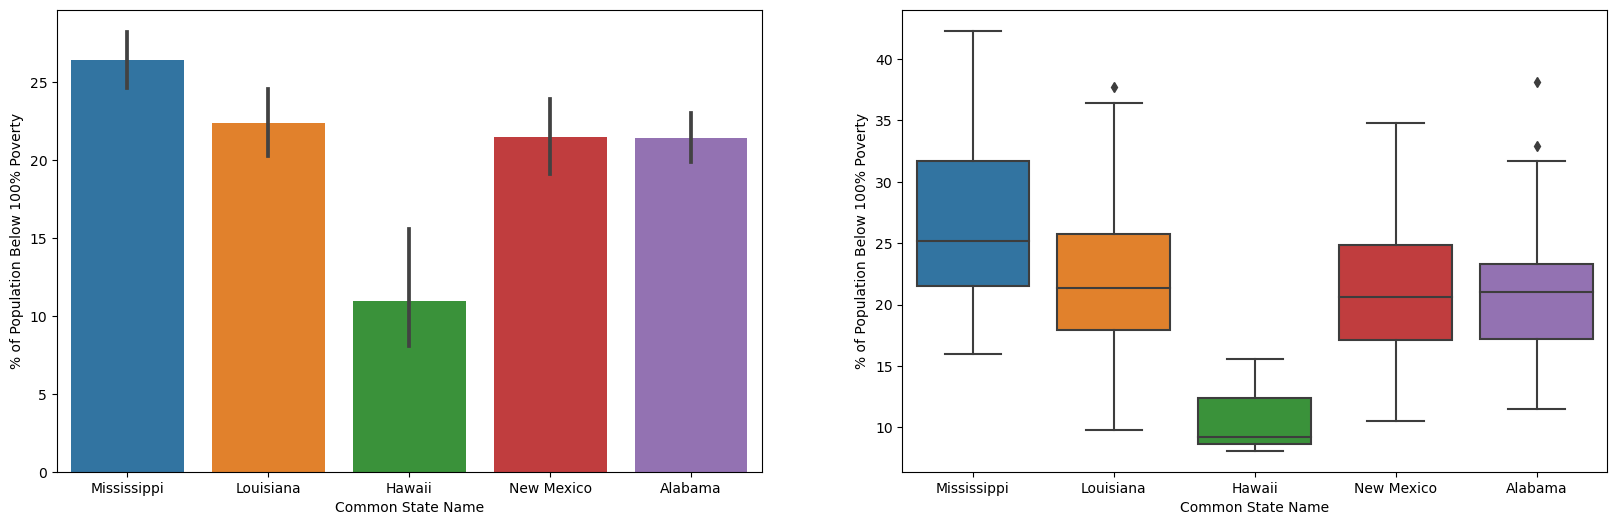

In [12]:
# Create barplot and boxplot for % of Population Below 100% Poverty by state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.barplot(top_five_df, x = 'Common State Name', y = '% of Population Below 100% Poverty')

plt.subplot(1, 2, 2)
sns.boxplot(top_five_df, x = 'Common State Name', y = '% of Population Below 100% Poverty')

plt.show()

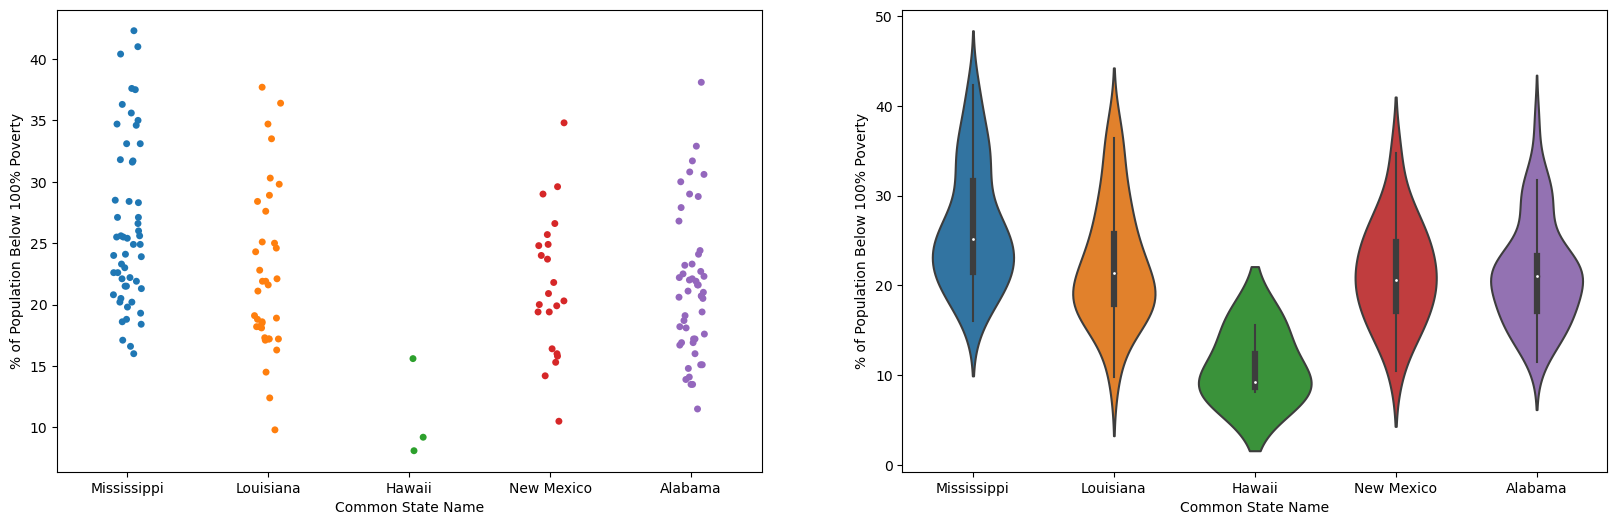

In [13]:
# Create strip plot and violin plot for % of Population Below 100% Poverty by state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.stripplot(top_five_df, x = 'Common State Name', y = '% of Population Below 100% Poverty',
              hue = 'Common State Name', legend = False)

plt.subplot(1, 2, 2)
sns.violinplot(top_five_df, x = 'Common State Name', y = '% of Population Below 100% Poverty')

plt.show()

### Since Hawaii has a significantly lower percent of the population within HPSA counties that live below the U.S. federal poverty level, I will exclude Hawaii from the "contender" states.

---
### What is the median number of FTE practitioners needed per HPSA county within the top four states?
#### **Answer: Median 2.3 in Alabama, 1.9 in New Mexico, 1.7 in Louisiana, and 1.5 in Mississippi**.

In [14]:
# Further subset the dataframe to the top five states
top_four = ['Mississippi', 'New Mexico', 'Louisiana', 'Alabama']

top_four_df = top_five_df[top_five_df['Common State Name'].isin(top_four)]

# Get descriptive statistics for HPSA Shortage
top_four_df.groupby('Common State Name')['HPSA Shortage'].describe()

,count,mean,std,min,25%,50%,75%,max
Common State Name,,,,,,,,
Alabama,49.0,3.239694,3.426263,0.010,0.6400,2.310,3.98000,14.75
Louisiana,36.0,2.940000,3.420465,0.065,0.8825,1.660,4.11375,17.33
Mississippi,54.0,2.173241,1.896860,0.115,0.8350,1.485,2.78000,8.45
New Mexico,22.0,3.230000,3.505299,0.190,0.9975,1.865,3.64250,12.28


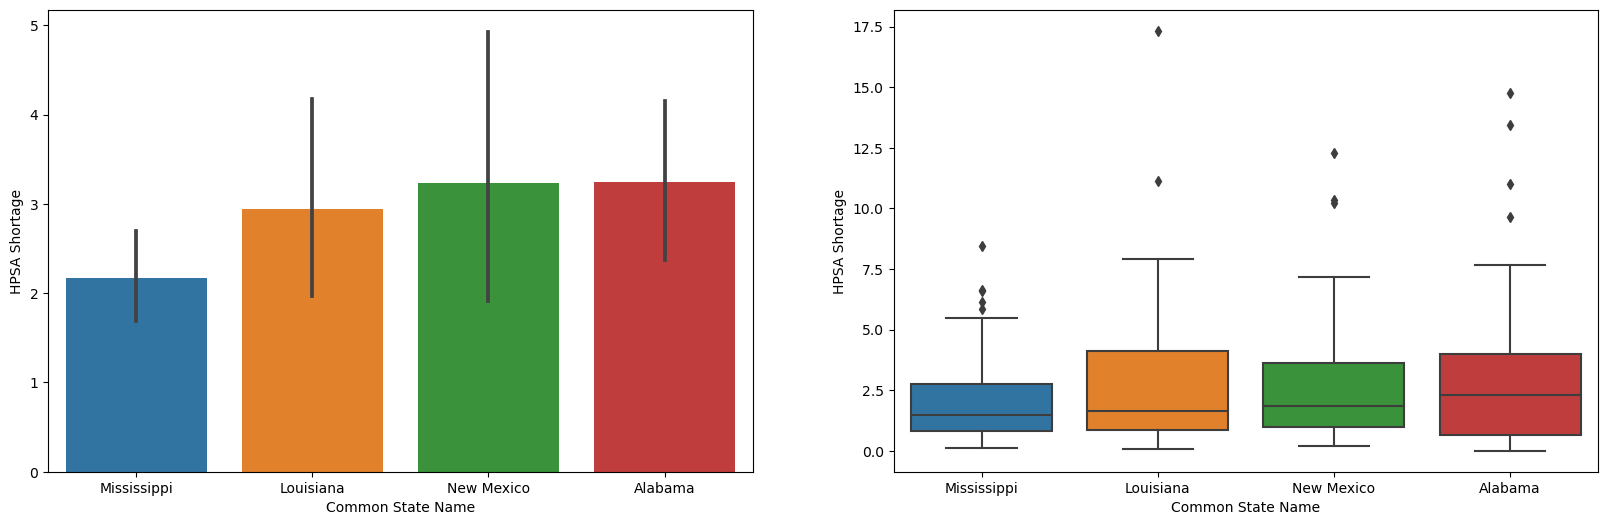

In [15]:
# Create barplot and boxplot for HPSA Shortage by state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.barplot(top_four_df, x = 'Common State Name', y = 'HPSA Shortage')

plt.subplot(1, 2, 2)
sns.boxplot(top_four_df, x = 'Common State Name', y = 'HPSA Shortage')

plt.show()

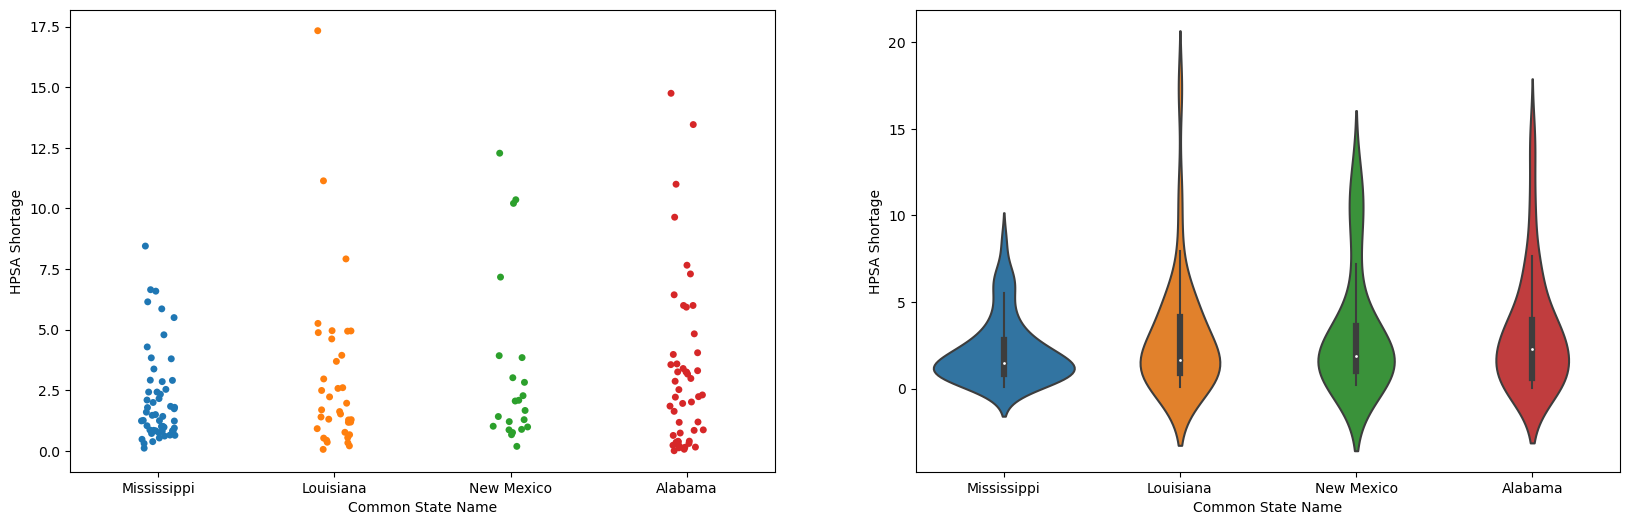

In [16]:
# Create strip plot and violin plot for HPSA Shortage by state
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.stripplot(top_four_df, x = 'Common State Name', y = 'HPSA Shortage',
              hue = 'Common State Name', legend = False)

plt.subplot(1, 2, 2)
sns.violinplot(top_four_df, x = 'Common State Name', y = 'HPSA Shortage')

plt.show()

---
### Which regions have the highest average HPSA Score?
#### **Answer: Southeast (Region 4 - score 14.4) and South Central (Region 6 - score 13.3)**

In [17]:
# Group entire hpsa dataframe by region
region = hpsa.groupby(['Common Region Name', 'Region Alias'])

# Get descriptive statistics for HPSA Score by region
region['HPSA Score'].describe()

,,count,mean,std,min,25%,50%,75%,max
Common Region Name,Region Alias,,,,,,,,
Region 1,New England,2.0,10.000000,1.414214,9.0,9.50,10.0,10.5,11.0
Region 10,North Far West,47.0,12.787234,3.243295,7.0,11.00,13.0,15.0,22.0
Region 2,Northeast Corridor,4.0,7.250000,0.957427,6.0,6.75,7.5,8.0,8.0
Region 3,Mid Atlantic,81.0,11.827160,3.015751,4.0,10.00,12.0,14.0,21.0
Region 4,Southeast,291.0,14.371134,3.606468,5.0,12.00,14.0,17.0,23.0
Region 5,Great Lakes,147.0,11.081633,2.978255,4.0,9.00,11.0,13.0,19.0
Region 6,South Central,233.0,13.291845,3.361903,4.0,11.00,13.0,16.0,20.0
Region 7,Northern Plains,88.0,9.840909,2.819825,4.0,8.00,10.0,12.0,16.0
Region 8,Rocky Mountains,138.0,13.028986,3.652700,4.0,11.00,13.0,15.0,22.0


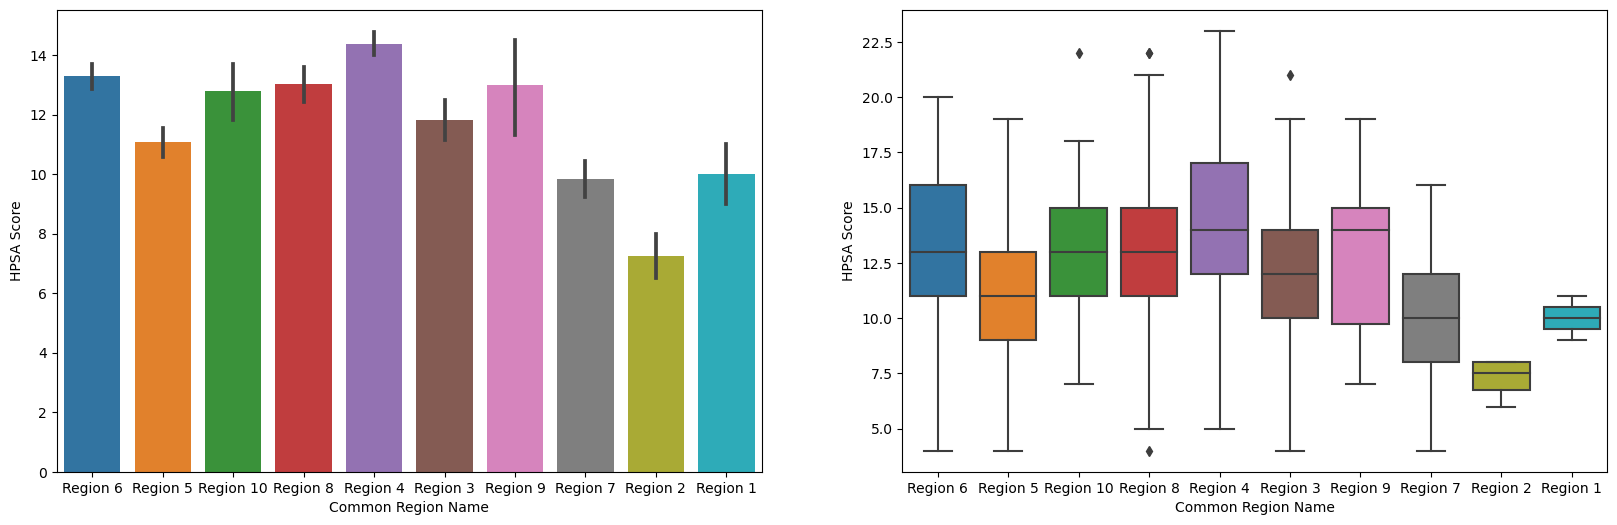

In [18]:
# Create barplot and boxplot for HPSA Score by region
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.barplot(hpsa, x = 'Common Region Name', y = 'HPSA Score')

plt.subplot(1, 2, 2)
sns.boxplot(hpsa, x = 'Common Region Name', y = 'HPSA Score')

plt.show()

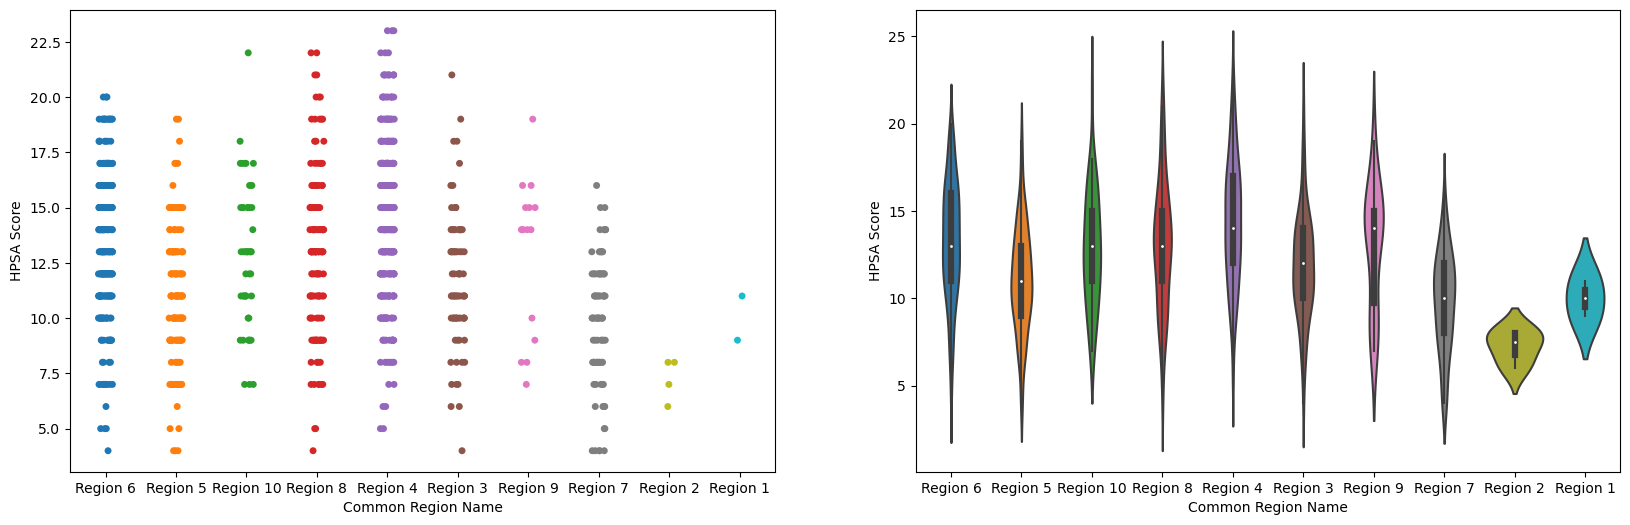

In [19]:
# Create strip plot and violin plot for HPSA Score by region
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.stripplot(hpsa, x = 'Common Region Name', y = 'HPSA Score', hue = 'Common Region Name', legend = False)

plt.subplot(1, 2, 2)
sns.violinplot(hpsa, x = 'Common Region Name', y = 'HPSA Score')

plt.show()

### It looks like the top four states are encompassed in Region 4 - Southeast (Mississippi & Alabama) and Region 6 - South Central (Lousiana & New Mexico).

To summarize:
* **Mississippi** - 66% of counties are HPSAs, average HPSA score of 15.6, median 25% of population within HPSAs living below federal poverty level, median 1.5 FTEs needed per HPSA county

* **Alabama** - 73% of counties are HPSAs, average HPSA score of 14.6, median 21% of population within HPSAs living below federal poverty level, median 2.3 FTEs needed per HPSA county

* **Louisiana** - 56% of counties are HPSAs, average HPSA score of 14.6, median 21% of population within HPSAs living below federal poverty level, median 1.7 FTEs needed per HPSA county

* **New Mexico** - 67% of counties are HPSAs, average HPSA score of 15.1, median 21% of population within HPSAs living below federal poverty level, median 1.9 FTEs needed per HPSA county

### Taking all these measures into account, and given that three of the states are adjacent to one another, I would like to focus more closely on Mississippi, Alabama, & Louisiana.